In [1]:
%load_ext autoreload
%matplotlib inline
execfile ("_ImportScript.py")
import time

1


In [2]:
import matplotlib.pyplot as plt

In [3]:
beatbox.You.create_original_Universe()

In [4]:
numreal = 100

for i in range(numreal):
    beatbox.You.initiate_simulated_universe(truncated_nmax = 15)

Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 an

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:597: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


In [5]:
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()


datamap = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)+beatbox.You.generate_one_realization_of_noise()
beatbox.You.all_simulated_universes[-1].ay_real = datamap
 

MOCK = 1
beatbox.You.solve_for_3D_potential(datamap.T , A=None, print_alpha=0)

0.00809693336487
total time is:
0.266053915024


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:431: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:494: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:440: RuntimeWarning: divide by zero encountered in power
  Power_Spectrum = PSnorm*10000*np.power((beatbox.Universe.k/kstar) ,(-3+(n_s-1)))


In [6]:
# cov_frac = np.zeros((numreal,1))
num_fn_rec = beatbox.Universe.numfn
num_fn_sim = beatbox.You.all_simulated_universes[0].get_instance_numfn()
num_l_modes = beatbox.You.inv_Cyy.shape[0]

true_fn_all = np.zeros((numreal,num_fn_sim))
true_fns = np.zeros((numreal,num_fn_rec))
datamap = np.zeros((numreal,num_l_modes))
noise_realization  = np.zeros((numreal,num_l_modes))
rec_fns = np.zeros((numreal,num_fn_rec))
diff_sigma = np.zeros((numreal,num_fn_rec))

ind = np.where(beatbox.You.all_simulated_universes[0].kfilter>0)
n = beatbox.Universe.n[ind]
n_fit = 7
nvec_long = np.zeros(2*len(ind[1]))
nvec_long[:len(ind[1])] = n
nvec_long[len(ind[1]): ] = n
nvec = np.zeros(len(ind[1]))
nvec[:len(ind[1])/2] = nvec_long[:len(ind[1])/2]
nvec[len(ind[1])/2: ] = nvec_long[len(ind[1]):3*len(ind[1])/2]
ind_fit = np.where(nvec <= n_fit)


for i in range(numreal):
# i =0
#     print i
    noise_realization[i,:] = beatbox.You.generate_one_realization_of_noise()
    true_alms = beatbox.You.all_simulated_universes[i].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[i].ay)
    datamap[i,:] =  true_alms + noise_realization[i,:]
    beatbox.You.solve_for_3D_potential(datamap[i,:].T , A=1, print_alpha=0)

    We=beatbox.Universe()        
    beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes,We)
    beatbox.You.all_data_universes[i].fn = beatbox.You.reconstrunct_fn

    if i == 0:
            ordered_inds_largenmax = beatbox.You.all_simulated_universes[i].get_ordered_fn_indices()
            ordered_inds_smallnmax = beatbox.You.all_data_universes[i].get_ordered_fn_indices()
    min_n_mode = np.min((len(ordered_inds_largenmax), len(ordered_inds_smallnmax) )    )

    true_fn_all[i,:] = beatbox.You.all_simulated_universes[i].fn.reshape(1,-1)
    true_fns[i,:] = (beatbox.You.all_simulated_universes[i].fn[ind_fit])[ordered_inds_smallnmax]
    rec_fns[i,:] = beatbox.You.all_data_universes[i].fn[ordered_inds_smallnmax[:min_n_mode]].reshape(1,-1)
    abs_diff = np.abs(true_fns[i,:] - rec_fns[i,:])
    err_sig = np.sqrt(np.diag(beatbox.You.inv_A)[ordered_inds_smallnmax[:min_n_mode]])
    diff_sigma[i,:] = np.divide(abs_diff.reshape(1,-1) , err_sig.reshape(1,-1) ).reshape(1,-1)

cov_frac = np.double(np.sum(diff_sigma<=1,axis=0)) / np.double(numreal)

#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/noise_" + str("%0.03d" % i) + ".txt", noise_realization)
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/true_alm_" + str("%0.03d" % i) + ".txt", true_alms)
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/true_fn_" + str("%0.03d" % i) + ".txt", true_fns )
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/rec_fn_" + str("%0.03d" % i) + ".txt", rec_fns )
#     np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data/abs_diff_" + str("%0.03d" % i) + ".txt", abs_diff)
print np.mean(cov_frac)

0.000550985336304
time for loading is:
0.00351190567017
successfully loaded A from the disk.
total time is:
0.00482892990112
0.000651121139526
time for loading is:
0.00981092453003
successfully loaded A from the disk.
total time is:
0.0114059448242
0.00090503692627
time for loading is:
0.00366401672363
successfully loaded A from the disk.
total time is:
0.00535583496094
0.000730991363525
time for loading is:
0.00394105911255
successfully loaded A from the disk.
total time is:
0.00549292564392
0.00120282173157
time for loading is:
0.00420594215393
successfully loaded A from the disk.
total time is:
0.00615382194519
0.000484943389893
time for loading is:
0.00359511375427
successfully loaded A from the disk.
total time is:
0.00518894195557
0.000707864761353
time for loading is:
0.00402903556824
successfully loaded A from the disk.
total time is:
0.00552201271057
0.000643968582153
time for loading is:
0.0054988861084
successfully loaded A from the disk.
total time is:
0.00825500488281
0.00

/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log10


-inf
0.0


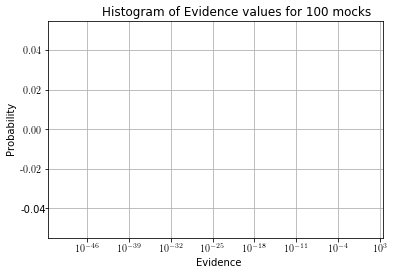

In [7]:
execfile ("_CalcEvidence.py")

In [8]:
print EvidenceVector

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


In [ ]:
noise_realization.shape

In [ ]:
ind = np.where(beatbox.You.all_simulated_universes[0].kfilter>0)
n = beatbox.Universe.n[ind]
n_fit = 5

nvec_long = np.zeros(2*len(ind[1]))
nvec_long[:len(ind[1])] = n
nvec_long[len(ind[1]): ] = n

nvec = np.zeros(len(ind[1]))
nvec[:len(ind[1])/2] = nvec_long[:len(ind[1])/2]
nvec[len(ind[1])/2: ] = nvec_long[len(ind[1]):3*len(ind[1])/2]

ind_fit = np.where(nvec <= n_fit)

TRUEFNFIT = (beatbox.You.all_simulated_universes[0].fn[ind_fit])[ordered_inds_smallnmax]
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/TRUEFNFIT.npy", TRUEFNFIT)



In [ ]:
def KL(mu0,mu1,C0,C1,C1_inv):
    k = C0.shape[0]
    detrat = np.divide(np.det(C1) , np.det(C0))
    D_KL = 0.5 * ( np.trace(C1_inv*C0) + (mu1-mu0).T * C1_inv * (mu1-mu0) - k + np.log(detrat))
    return D_KL

In [ ]:
R_orig = 

In [ ]:
np.unique(beatbox.You.all_data_universes[0].kfilter)

In [ ]:
# np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data2/err_sig.txt", err_sig)
# np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data2/Cn.txt", beatbox.You.inv_Cyy)
# np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data2/Cp.txt", beatbox.You.inv_Cf)
# np.savetxt( "/Users/yashar/GravIT/Cycle_4_analysis/data2/R.txt", beatbox.You.R_real)

np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/Cn.npy", beatbox.You.inv_Cyy)
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/Cp.npy", beatbox.You.inv_Cf)
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/R.npy", beatbox.You.R_real)
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/inv_A.npy", beatbox.You.inv_A)

# np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/R.npy", beatbox.You.R_real)


np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/noise_realization.npy", noise_realization)

np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/truefnall.npy", true_fn_all)
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/truefn.npy", true_fns)
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/recfn.npy", rec_fns)
np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/datamap.npy", datamap)

np.save( "/Users/yashar/GravIT/Cycle_4_analysis/data2/err_sig.npy", err_sig)


In [ ]:
# Check calculated k covariance from samples, against prior covariance matrix
numCp = np.zeros(len(beatbox.You.all_simulated_universes[0].fn))
for j in range(len(beatbox.You.all_simulated_universes[0].fn)):
    fns = [beatbox.You.all_simulated_universes[i].fn[j] for i in range(numreal)]
    numCp[j] = np.std(fns) #1./(np.std(fns)**2)

plt.plot(numCp)
plt.plot(1/np.sqrt(np.diag(beatbox.You.inv_Cf)),'--')

In [ ]:
plt.plot(beatbox.You.all_simulated_universes[0].fn[ordered_inds_largenmax],' +')
err_sig = np.sqrt(np.diag(beatbox.You.inv_A)[ordered_inds_smallnmax])
eb2 = plt.errorbar(np.arange(0,len(beatbox.You.all_data_universes[0].fn)).reshape(-1,1) , beatbox.You.all_data_universes[0].fn[ordered_inds_smallnmax].reshape(-1,1) , yerr = err_sig.reshape(-1,1),ls=' ')
plt.axis([1 ,34, -20, 20])

In [ ]:
# test that the noise covariance matrix is correct
datamap = np.zeros((numreal,24))

for i in range(numreal):
    datamap[i,:] = beatbox.You.generate_one_realization_of_noise()



In [ ]:
datamap.shape

In [ ]:
plt.subplot(1,2,1)
plt.imshow(np.cov(datamap.T))
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(np.linalg.inv(beatbox.You.inv_Cyy))
plt.colorbar()

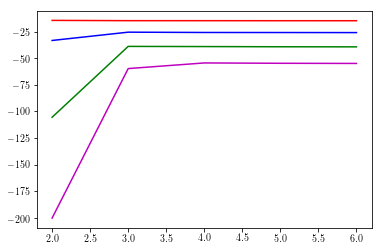

In [32]:
import matplotlib.pyplot as plt
plt.plot([2,3,4,5,6], [np.log10(2.87668901799e-15)  , np.log10(1.57315391567e-15)  , np.log10(1.5032425107e-15)  , np.log10(1.41114944731e-15) , np.log10(1.38385018135e-15)], 'r')
plt.plot([2,3,4,5,6], [np.log10(4.215e-34)  , np.log10(2.54236997449e-26)  , np.log10(1.31705376912e-26) , np.log10( 1.18082059763e-26), np.log10(1.01580984301e-26)], 'b')
plt.plot([2,3,4,5,6], [np.log10(3.82470293547e-106)  , np.log10(1.13637818657e-39 )  , np.log10(7.96146014194e-40 ) , np.log10( 5.14900346283e-40), np.log10(4.29121023639e-40)], 'g')
plt.plot([2,3,4,5,6], [-200  , np.log10(1.79234397169e-60  )  , np.log10(3.41007454966e-55 ) , np.log10( 1.6310229369e-55), np.log10(1.16874953693e-55)], 'm')
# plt.plot([2,3,4,5,6], [-200  , np.log10(3.00160414668e-116  )  , np.log10(1.52672624596e-73 ) , np.log10( 1.07692904355e-71), np.log10(3.16842357761e-72)], 'c')

# plt.plot([2,3,4,5,6], [-200  , -200, np.log10(2.00123030482e-121 ) , np.log10( 1.05208835636e-92), -200], 'y')






plt.show()